<a href="https://colab.research.google.com/github/tazar09/un_inputs/blob/main/session2_18iul-2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [1]:
!pip install PyPDF2
!pip install langdetect
!pip install adjustText

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=80616c678221e5abd0ac8f8c8b8842611cf0241c83c6fee0aa85591dad1b103e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
import pandas as pd
import math
pd.options.display.max_rows = 601

import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

from PyPDF2 import PdfReader
from textblob import TextBlob

import time
from langdetect import detect

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# 1. Collect data here

In [3]:
url_1 = 'https://financing.desa.un.org/un-tax-convention/inputs'
url_2 = 'https://financing.desa.un.org/un-tax-convention/second-session-inputs'

In [4]:
def scrape_link(url):
    pdf_data = []
    response = requests.get(url)
    if response.status_code == 200:
      soup = BeautifulSoup(response.content, 'html.parser')

      for link in soup.find_all('a', href=lambda href: href and href.endswith('.pdf')):
       text = link.text.strip()  # Extract link text (attribute)
       url = link.get('href')  # Extract PDF URL from 'href' attribute
       pdf_data.append({'text': text, 'url': url})

    # Create a Pandas DataFrame
      df = pd.DataFrame(pdf_data)
      return df

    else:
      print(f"Error: Website request failed with status code {response.status_code}")
      return none

In [5]:
def scrape_and_analyze_pdfs(url):
  # Data structure to store results
  data = []
  delay = 3

  # Scrape PDF links and attributes
  pdf_data = scrape_link(url = url)

  # Download and analyze each PDF
  if pdf_data is not None:
    for index, row in pdf_data.iterrows():
      pdf_url = row['url']
      text = row['text']

      # Download the PDF (replace with error handling)
      response = requests.get(pdf_url, stream=True)
      if response.status_code == 200:
        with open(f"pdf_{index+1}.pdf", 'wb') as f:
          for chunk in response.iter_content(1024):
            f.write(chunk)

        time.sleep(delay)
        # Extract text using PyPDF2 (replace with more advanced NLP techniques)
        reader = PdfReader(f"pdf_{index+1}.pdf")
        extracted_text = ""
        for page in reader.pages:
          extracted_text += page.extract_text()

        extracted_text = extracted_text.strip()
        extracted_text = re.sub(r'\s+', ' ', extracted_text)

        data.append({'text': text, 'url': pdf_url, 'extracted_text': extracted_text})

      # Remove downloaded PDF (optional)
      # os.remove(f"pdf_{index+1}.pdf")

  # Create a Pandas DataFrame
  df = pd.DataFrame(data)
  return df

In [6]:
# Call the function with your target URL (replace with your actual URL)
target_url = url_2
pdf_data = scrape_and_analyze_pdfs(target_url)

In [7]:
pdf_data

,text,url,extracted_text
0,Credit Rating Agencies and Sovereign Debt Paper,https://financing.desa.un.org/sites/default/fi...,Credit Rating Agencies and Sovereign Debt : Ch...
1,Bureau’s Proposal for the Zero Draft Terms of ...,https://financing.desa.un.org/sites/default/fi...,Introductory Note to the Bureau’s Proposal for...
2,African Group,https://financing.desa.un.org/sites/default/fi...,1 COMMENTS BY THE AFRICAN GROUP ON THE BUREAU’...
3,Algeria,https://financing.desa.un.org/sites/default/fi...,1 Algeria's inputs on the bureau’s proposal fo...
4,[ENG & SP],https://financing.desa.un.org/sites/default/fi...,Comentarios por escrito al borrador cero de T ...
5,Austria,https://financing.desa.un.org/sites/default/fi...,Invitation to provide comments on the Zero Dra...
6,Bahamas,https://financing.desa.un.org/sites/default/fi...,The Commonwealth of The Bahamas Input on UN Fr...
7,,https://financing.desa.un.org/sites/default/fi...,The Commonwealth of The Bahamas Input on UN Fr...
8,Barbados,https://financing.desa.un.org/sites/default/fi...,", Permanent Mission of Barbados to the United ..."
9,[ENG],https://financing.desa.un.org/sites/default/fi...,Unofficial translation Ministry of Taxes and D...


In [8]:
# pdf_data['extracted_text'] = pdf_data['extracted_text'].apply(lambda x: re.sub(r'\s+', ' ',x))
# pdf_data['extracted_text'] = pdf_data['extracted_text'].str.strip()

def extract_country(text):
  match = re.search(r"(?<=2024-03\/)([^_]+)(?=_Input)", text)
  return match.group(1) if match else None  # Handle cases where no match is found

pdf_data['country'] = pdf_data['url'].apply(extract_country)

pdf_data['country'] = pdf_data['country'].str.replace("%", ' ')
pdf_data['country'] = pdf_data['country'].str.replace("20", '')
pdf_data['country'] = pdf_data['country'].str.strip()


In [9]:
pdf_data = pdf_data[['text', 'country', 'url', 'extracted_text']]
pdf_data.head()

,text,country,url,extracted_text
0,Credit Rating Agencies and Sovereign Debt Paper,None,https://financing.desa.un.org/sites/default/fi...,Credit Rating Agencies and Sovereign Debt : Ch...
1,Bureau’s Proposal for the Zero Draft Terms of ...,None,https://financing.desa.un.org/sites/default/fi...,Introductory Note to the Bureau’s Proposal for...
2,African Group,None,https://financing.desa.un.org/sites/default/fi...,1 COMMENTS BY THE AFRICAN GROUP ON THE BUREAU’...
3,Algeria,None,https://financing.desa.un.org/sites/default/fi...,1 Algeria's inputs on the bureau’s proposal fo...
4,[ENG & SP],None,https://financing.desa.un.org/sites/default/fi...,Comentarios por escrito al borrador cero de T ...


In [11]:
pdf = pdf_data.copy()

In [12]:
pdf.loc[pdf['text'] == '[ENG]', 'text'] = pdf['country'].where(pdf['text'] == '[ENG]')
pdf['sentiment'] = pdf['extracted_text'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [13]:
def detect_language(text):
  try:
    return detect(text)
  except:
    return None  # Handle potential errors during language detection

pdf['language'] = pdf['extracted_text'].apply(detect_language)

In [14]:
pdf = pdf[['text', 'country', 'url', 'extracted_text', 'language', 'sentiment']]

In [19]:
pdf.head(100).sort_values(by = 'sentiment', ascending = False)

,text,country,url,extracted_text,language,sentiment
63,Uganda,None,https://financing.desa.un.org/sites/default/fi...,UGANDA’S COMMENTS ON THE ZERO DRAFT TERMS OF R...,en,0.223488
85,Committee on Fiscal Studies (CFS),None,https://financing.desa.un.org/sites/default/fi...,"Lyla Latif, PhD Chair and Research Lead Commit...",en,0.190126
84,,None,https://financing.desa.un.org/sites/default/fi...,"Lyla Latif, PhD Chair and Research Lead Commit...",en,0.190126
65,United Kingdom,None,https://financing.desa.un.org/sites/default/fi...,Official 1 OFFICIAL UK comments on the zero dr...,en,0.161687
53,Saudi Arabia,None,https://financing.desa.un.org/sites/default/fi...,Saudi Arabia’s inputs on Bureau’s Proposal for...,en,0.154708
46,Netherlands,None,https://financing.desa.un.org/sites/default/fi...,Submission by The Kingdom of the Netherlands W...,en,0.154010
49,Philippines,None,https://financing.desa.un.org/sites/default/fi...,Philippines’ Comments on the Zero Draft Terms ...,en,0.153516
87,Dejusticia,None,https://financing.desa.un.org/sites/default/fi...,"Bogotá, Colombia. June 21, 2024 Mr. Ramy Youse...",en,0.150841
86,,None,https://financing.desa.un.org/sites/default/fi...,"Bogotá, Colombia. June 21, 2024 Mr. Ramy Youse...",en,0.150841
37,Japan,None,https://financing.desa.un.org/sites/default/fi...,1 Japan’s Written Inputs to the Zero Draft Ter...,en,0.144071


In [ ]:
def analyze_sentiment(text):

  # Create VADER sentiment analyzer
  analyzer = SentimentIntensityAnalyzer()

  # Analyze sentiment
  sentiment = analyzer.polarity_scores(text)

  return sentiment

In [ ]:
def sentiment_analysis_df(data):

  # Add new columns for sentiment scores
  data['sentiment'] = data['extracted_text'].apply(analyze_sentiment)
  data['compound'] = data['sentiment'].apply(lambda x: x['compound'])
  data['pos'] = data['sentiment'].apply(lambda x: x['pos'])
  data['neg'] = data['sentiment'].apply(lambda x: x['neg'])
  data['neu'] = data['sentiment'].apply(lambda x: x['neu'])  # Extract neutral score

  # Return the DataFrame with sentiment scores
  return data

In [ ]:
pdf_data = pdf

In [ ]:
pdf_sent = sentiment_analysis_df(pdf_data)  # Avoid modifying original DataFrame
pdf_sent.head()

,text,country,url,extracted_text,sentiment,language,compound,pos,neg,neu
0,African Group,African Group,https://financing.desa.un.org/sites/default/fi...,,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",None,0.0000,0.000,0.000,0.000
1,Austria,Austria,https://financing.desa.un.org/sites/default/fi...,Invitation to provide inputs to the work of th...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",en,0.9957,0.125,0.000,0.875
2,Bahamas,Bahamas,https://financing.desa.un.org/sites/default/fi...,The Commonwealth of The Bahamas Input on UN Fr...,"{'neg': 0.037, 'neu': 0.819, 'pos': 0.144, 'co...",en,0.9996,0.144,0.037,0.819
3,Belarus,Belarus,https://financing.desa.un.org/sites/default/fi...,№ й'.-ЛрШгPERMANENT MISSION OF THE REPUBLIC OF...,"{'neg': 0.012, 'neu': 0.903, 'pos': 0.085, 'co...",en,0.9969,0.085,0.012,0.903
4,[RUS],Belarus,https://financing.desa.un.org/sites/default/fi...,№ й'.-ЛрШгPERMANENT MISSION OF THE REPUBLIC OF...,"{'neg': 0.0, 'neu': 0.967, 'pos': 0.033, 'comp...",ru,0.9810,0.033,0.000,0.967


In [ ]:
# pdf_sent.to_excel('inputs_sent.xlsx')

# 2. Start import here

In [ ]:
df = pd.read_excel('/content/inputs_sent.xlsx')

In [ ]:
df.head()

,Unnamed: 0,text,text_short,state,oecd,north,geo,country,url,extracted_text,sentiment,language,compound,pos,neg,neu,vote
0,0,African Group,African Group,1,0,0,Africa,African Group,https://financing.desa.un.org/sites/default/fi...,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",NaN,0.0000,0.000,0.000,0.000,Y
1,1,Austria,Austria,1,1,1,EU,Austria,https://financing.desa.un.org/sites/default/fi...,Invitation to provide inputs to the work of th...,"{'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'comp...",en,0.9957,0.125,0.000,0.875,N
2,2,Bahamas,Bahamas,1,0,1,America,Bahamas,https://financing.desa.un.org/sites/default/fi...,The Commonwealth of The Bahamas Input on UN Fr...,"{'neg': 0.037, 'neu': 0.819, 'pos': 0.144, 'co...",en,0.9996,0.144,0.037,0.819,Y
3,3,Belarus,Belarus,1,0,0,Rusia,Belarus,https://financing.desa.un.org/sites/default/fi...,№ й'.-ЛрШгPERMANENT MISSION OF THE REPUBLIC OF...,"{'neg': 0.012, 'neu': 0.903, 'pos': 0.085, 'co...",en,0.9969,0.085,0.012,0.903,Y
4,4,[RUS],[RUS],1,0,0,Rusia,Belarus,https://financing.desa.un.org/sites/default/fi...,№ й'.-ЛрШгPERMANENT MISSION OF THE REPUBLIC OF...,"{'neg': 0.0, 'neu': 0.967, 'pos': 0.033, 'comp...",ru,0.9810,0.033,0.000,0.967,Y


In [ ]:
# df[df['extracted_text'].isna()]
# df[df['language'] != 'en']

In [ ]:
def count_words(text):
  if isinstance(text, str):
    return len(text.split())
  else:
    return 0  # Or any other value you want for non-strings (e.g., np.NAN)

In [ ]:
df['total_words'] = df['extracted_text'].apply(lambda x: count_words(x))

In [ ]:
df.drop(['Unnamed: 0', 'country', 'sentiment', 'url'], axis = 1, inplace = True)
df.drop(index = [76, 4, 7, 31, 40, 69, 78], inplace = True)
df = df.query('total_words != 0')
df = df.query('total_words != 1')

In [ ]:
def preprocess_text(text):
  # Lowercase the text
  text = text.lower()
  # Remove punctuation
  punctuations = "!?_/\=~`'"
  for punct in punctuations:
    text = text.replace(punct, "")
  # Return the pre-processed text
  return text

#!,.?():_;/\=~`'

In [ ]:
df.head()

,text,text_short,state,oecd,north,geo,extracted_text,language,compound,pos,neg,neu,vote,total_words
1,Austria,Austria,1,1,1,EU,Invitation to provide inputs to the work of th...,en,0.9957,0.125,0.000,0.875,N,544
2,Bahamas,Bahamas,1,0,1,America,The Commonwealth of The Bahamas Input on UN Fr...,en,0.9996,0.144,0.037,0.819,Y,2075
3,Belarus,Belarus,1,0,0,Rusia,№ й'.-ЛрШгPERMANENT MISSION OF THE REPUBLIC OF...,en,0.9969,0.085,0.012,0.903,Y,1305
5,Belgium,Belgium,1,1,1,EU,Written submission of Belgium to the call for ...,en,0.9962,0.187,0.006,0.807,N,348
6,Bolivia,Bolivia,1,0,0,America,PLURINACIONAL STATE OF BOLIVIA M I N I S T R Y...,en,0.9962,0.096,0.019,0.885,Lack,1415


In [ ]:
df['text_proc'] = df['extracted_text'].apply(preprocess_text)

In [ ]:
df.reset_index(inplace = True)
df.index

RangeIndex(start=0, stop=93, step=1)

In [ ]:
df = df[['text_short', 'state', 'oecd', 'north','geo', 'total_words', 'vote', 'text_proc']]

In [ ]:
df.head(5)

,text_short,state,oecd,north,geo,total_words,vote,text_proc
0,Austria,1,1,1,EU,544,N,invitation to provide inputs to the work of th...
1,Bahamas,1,0,1,America,2075,Y,the commonwealth of the bahamas input on un fr...
2,Belarus,1,0,0,Rusia,1305,Y,№ й.-лршгpermanent mission of the republic of ...
3,Belgium,1,1,1,EU,348,N,written submission of belgium to the call for ...
4,Bolivia,1,0,0,America,1415,Lack,plurinacional state of bolivia m i n i s t r y...


In [ ]:
from nltk.corpus import stopwords  # stopwords for preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation  # LDA for topic modeling
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def preprocess_text(text):
  stop_words = stopwords.words('english')
  return ' '.join([word.lower() for word in text.split() if word not in stop_words])

df['text_stopwords'] = df['text_proc'].apply(preprocess_text)
df[['text_proc', 'text_stopwords']].head(10)

,text_proc,text_stopwords
0,invitation to provide inputs to the work of th...,invitation provide inputs work ad hoc committe...
1,the commonwealth of the bahamas input on un fr...,commonwealth bahamas input un framework conven...
2,№ й.-лршгpermanent mission of the republic of ...,№ й.-лршгpermanent mission republic belarus un...
3,written submission of belgium to the call for ...,written submission belgium call input ahead fi...
4,plurinacional state of bolivia m i n i s t r y...,plurinacional state bolivia n r f f r e g n f ...
5,brazil - inputs - draft terms of reference for...,brazil - inputs - draft terms reference united...
6,20240315 1 ad hoc committee to draft terms of ...,20240315 1 ad hoc committee draft terms refere...
7,input s from chile to the first substantive se...,input chile first substantive session ad hoc c...
8,colombia inputs to the committee´s first subst...,colombia inputs committee´s first substantive ...
9,response of czechia to the request by the chai...,response czechia request chair ad hoc committe...


In [ ]:
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
tfidf_matrix = vectorizer.fit_transform(df['text_stopwords'])

In [ ]:
tfidf_matrix

<93x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 22056 stored elements in Compressed Sparse Row format>

In [ ]:
# Define number of topics
num_topics = 5  # Adjust number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [ ]:
# Get dominant topic for each document
dominant_topics = lda_model.transform(tfidf_matrix).argmax(axis=1)

# Loop through dataframe and analyze text by topic
for i, row in df.iterrows():
    topic_num = dominant_topics[i]
    # Get topic keywords based on the model (refer to the model object for methods)
    topic_words = [vectorizer.get_feature_names_out()[i] for i in lda_model.components_[topic_num].argsort()[-5:]]  # Top 10 words
    print(f"Document {i+1} - Topic: {topic_num+1} - Key Words: {', '.join(topic_words)}")
    # Analyze and compare the row's text content based on the topic words here
    print(f"Text: {row['text_stopwords']}\n")  # Replace 'text_column' with your actual column name


In [ ]:
dominant_topics

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
# Train the LDA model
# Define number of topics (experiment with different values)
num_topics = 5  # Adjust number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

# Analyze and compare text by topic
dominant_topics = lda_model.transform(tfidf_matrix).argmax(axis=1)

for i, row in df.iterrows():
  topic_num = dominant_topics[i]
  topic_words = [vectorizer.get_feature_names_out()[i] for i in lda_model.components_[topic_num].argsort()[-10:]]  # Top 10 words
  print(f"Document {i+1} - Topic: {topic_num+1} - Key Words: {', '.join(topic_words)}")

  # Analyze text based on topic keywords
  text = row['text_stopwords']
  highlighted_text = text
  for keyword in topic_words:
    highlighted_text = highlighted_text.replace(keyword, f"**{keyword}**")  # Highlight keywords
  print(f"Text: {highlighted_text}\n")


Document 1 - Topic: 1 - Key Words: taxation, global, committee, countries, un, cooperation, framework, convention, international, tax
Text: invitation provide inputs work ad hoc **committee** draft terms reference **un**ited nations **framework** **convention** **international** **tax** **cooperation** preparation first session – drafting terms reference indicative list matters addressed draft terms reference submission republic austria republic austria welcomes possibility provide written inp ut preparation first (substantive) session ad hoc **committee** draft terms reference **un**ited nations **framework** **convention** **international** **tax** **cooperation** . facilitate substa ntive scoping draft terms r eference discuss ion indicative list f matters addressed draft terms reference, republic austria wishes submit following: future **un**ited nations **framework** **convention** **international** **tax** **cooperation** seek catalyse **global** dialogue create policy synerg ies

In [ ]:
# ... (after training the LDA model)

for topic_num in range(num_topics):
  topic_words = [vectorizer.get_feature_names_out()[i] for i in lda_model.components_[topic_num].argsort()[-10:]]  # Top 10 words
  print(f"Topic {topic_num + 1}: {' | '.join(topic_words)}")


Topic 1: taxation | global | committee | countries | un | cooperation | framework | convention | international | tax
Topic 2: data | remain | might | 19 | 24 | 10 | 15 | as | 16 | dokumento
Topic 3: inclusion | engagement | government | apply | self | stakeholder | relating | population | uk | guernsey
Topic 4: laws | meeting | page | north | taxpayers | stakeholder | worldwide | asia | institute | tei
Topic 5: institute | eva | aucejo | andrés | eesc | vol | guernsey | owens | dokumento | tei


# Dictionaries

In [ ]:
 dic = pd.read_excel('/content/dictionaries.xlsx')

In [ ]:
dic.head()

,change,resistance,beps,hnwi,climate,organisational,dic_ro
0,corporat*,action plan,corporat*,weath*,paris,agenda,capacit*
1,wealth*,sensib*,aggressive,offshor*,climat*,bodies,build*
2,aggressive,budget*,offshor*,financ*,NaN,commission,exchang*
3,capital,certainty,fair*,rich*,NaN,body,information
4,offshor*,claim,equit*,illicit,NaN,committee,assist


Dictionar - org/change/resist/beps/hnwi/capacity

In [ ]:
dic_org = dic['organisational'].str.replace('*', '')
list_org_n = list(dic_org)
list_org = [x for x in list_org_n if str(x) != 'nan']

dic_change = dic['change'].str.replace('*', '')
list_change_n = list(dic_change)
list_change = [x for x in list_change_n if str(x) != 'nan']

dic_resist= dic['resistance'].str.replace('*', '')
list_resist_n = list(dic_resist)
list_resist = [x for x in list_resist_n if str(x) != 'nan']

dic_beps= dic['beps'].str.replace('*', '')
list_beps_n = list(dic_resist)
list_beps = [x for x in list_beps_n if str(x) != 'nan']

dic_hnwi = dic['hnwi'].str.replace('*', '')
list_hnwi_n = list(dic_hnwi)
list_hnwi = [x for x in list_hnwi_n if str(x) != 'nan']

dic_dic_ro = dic['dic_ro'].str.replace('*', '')
list_dic_ro_n = list(dic_dic_ro)
list_dic_ro = [x for x in list_dic_ro_n if str(x) != 'nan']

All regex's

In [ ]:
regex_change = r'\b\w*(?:' + '|'.join(list_change) + r')\w*\b'
regex_resist = r'\b\w*(?:' + '|'.join(list_resist) + r')\w*\b'
regex_org = r'\b\w*(?:' + '|'.join(list_org) + r')\w*\b'

regex_beps = r'\b\w*(?:' + '|'.join(list_beps) + r')\w*\b'
regex_hnwi = r'\b\w*(?:' + '|'.join(list_hnwi) + r')\w*\b'
regex_dic_ro = r'\b\w*(?:' + '|'.join(list_dic_ro) + r')\w*\b'

In [ ]:
def count_matches_change(text):
  matches = re.findall(regex_change, text)
  return len(matches)

def count_matches_resist(text):
  matches = re.findall(regex_resist, text)
  return len(matches)

def count_matches_org(text):
  matches = re.findall(regex_org, text)
  return len(matches)

def count_matches_beps(text):
  matches = re.findall(regex_beps, text)
  return len(matches)

def count_matches_hnwi(text):
  matches = re.findall(regex_hnwi, text)
  return len(matches)

def count_matches_dic_ro(text):
  matches = re.findall(regex_dic_ro, text)
  return len(matches)

In [ ]:
df['change']=df['text_proc'].apply(count_matches_change)
df['resist']=df['text_proc'].apply(count_matches_resist)
df['org']=df['text_proc'].apply(count_matches_org)

df['beps'] = df['text_proc'].apply(count_matches_beps)
df['hnwi'] = df['text_proc'].apply(count_matches_hnwi)
df['dic_ro']=df['text_proc'].apply(count_matches_dic_ro)



df['change_%'] = round((df['change']/df['total_words'])*100,1)
df['resist_%'] = round((df['resist']/df['total_words'])*100,1)
df['org_%'] = round((df['org']/df['total_words'])*100,1)

df['beps_%'] = round((df['beps']/df['total_words'])*100,1)
df['hnwi_%'] = round((df['hnwi']/df['total_words'])*100,1)
df['dic_ro_%'] = round((df['dic_ro']/df['total_words'])*100,1)

In [ ]:
df.drop(['change', 'resist', 'org', 'beps', 'hnwi', 'dic_ro'], axis = 1, inplace = True)

In [ ]:
df['total_words_stand'] =( df['total_words'] - df['total_words'].mean() ) / df['total_words'].std()

In [ ]:
df.head()

,text_short,state,oecd,north,geo,text_proc,total_words,vote,change_%,resist_%,org_%,beps_%,hnwi_%,dic_ro_%,total_words_stand
0,Austria,1,1,1,EU,invitation to provide inputs to the work of th...,544,N,7.5,5.7,15.6,5.7,1.8,2.8,-0.853781
1,Bahamas,1,0,1,America,the commonwealth of the bahamas input on un fr...,2075,Y,11.8,3.1,12.0,3.1,2.9,4.0,1.057451
2,Belarus,1,0,0,Rusia,№ й.-лршгpermanent mission of the republic of ...,1305,Y,8.7,2.0,10.7,2.0,0.6,1.6,0.096217
3,Belgium,1,1,1,EU,written submission of belgium to the call for ...,348,N,10.3,10.1,15.8,10.1,3.4,5.2,-1.098459
4,Bolivia,1,0,0,America,plurinacional state of bolivia m i n i s t r y...,1415,Lack,12.5,2.8,12.5,2.8,2.2,3.5,0.233536


In [ ]:
df.sort_values('dic_ro_%', ascending = False).head()

,text_short,state,oecd,north,geo,text_proc,total_words,vote,change_%,resist_%,org_%,beps_%,hnwi_%,dic_ro_%,total_words_stand
7,Chile,1,1,0,America,input s from chile to the first substantive se...,479,Y,11.7,3.5,14.6,3.5,2.7,5.4,-0.934924
21,Kenya,1,0,0,Africa,iso 9001:2015 certified internal kenya’s input...,1438,Y,9.7,2.9,9.9,2.9,2.4,5.4,0.262249
15,Iran,1,0,0,ASIA,1 inputs on un tax convention terms of referen...,666,Y,11.7,2.4,14.3,2.4,2.6,5.4,-0.701482
45,UN EP,0,0,0,UN Entities,proposed inputs from the industry and economy ...,664,Lack,9.2,3.5,6.3,3.5,1.8,5.3,-0.703978
3,Belgium,1,1,1,EU,written submission of belgium to the call for ...,348,N,10.3,10.1,15.8,10.1,3.4,5.2,-1.098459


In [ ]:
df.head()

,text_short,state,oecd,north,geo,text_proc,total_words,vote,change_%,resist_%,org_%,beps_%,hnwi_%,dic_ro_%,total_words_stand
0,Austria,1,1,1,EU,invitation to provide inputs to the work of th...,544,N,7.5,5.7,15.6,5.7,1.8,2.8,-0.853781
1,Bahamas,1,0,1,America,the commonwealth of the bahamas input on un fr...,2075,Y,11.8,3.1,12.0,3.1,2.9,4.0,1.057451
2,Belarus,1,0,0,Rusia,№ й.-лршгpermanent mission of the republic of ...,1305,Y,8.7,2.0,10.7,2.0,0.6,1.6,0.096217
3,Belgium,1,1,1,EU,written submission of belgium to the call for ...,348,N,10.3,10.1,15.8,10.1,3.4,5.2,-1.098459
4,Bolivia,1,0,0,America,plurinacional state of bolivia m i n i s t r y...,1415,Lack,12.5,2.8,12.5,2.8,2.2,3.5,0.233536


# Filtering df

In [ ]:
df = df[df['state'] == 1]
df.head()

,text_short,state,oecd,north,geo,text_proc,total_words,vote,change_%,resist_%,org_%,beps_%,hnwi_%,dic_ro_%,total_words_stand
0,Austria,1,1,1,EU,invitation to provide inputs to the work of th...,544,N,7.5,5.7,15.6,5.7,1.8,2.8,-0.853781
1,Bahamas,1,0,1,America,the commonwealth of the bahamas input on un fr...,2075,Y,11.8,3.1,12.0,3.1,2.9,4.0,1.057451
2,Belarus,1,0,0,Rusia,№ й.-лршгpermanent mission of the republic of ...,1305,Y,8.7,2.0,10.7,2.0,0.6,1.6,0.096217
3,Belgium,1,1,1,EU,written submission of belgium to the call for ...,348,N,10.3,10.1,15.8,10.1,3.4,5.2,-1.098459
4,Bolivia,1,0,0,America,plurinacional state of bolivia m i n i s t r y...,1415,Lack,12.5,2.8,12.5,2.8,2.2,3.5,0.233536


# Visualisation

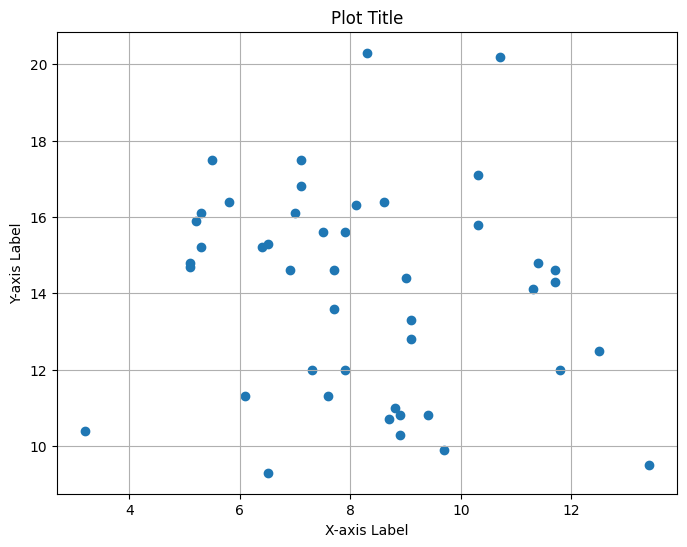

In [ ]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called 'df' and the columns for plotting are 'x' and 'y'
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
plt.scatter(df['change_%'], df['org_%'])
plt.xlabel('X-axis Label')  # Set labels for x and y axes
plt.ylabel('Y-axis Label')
plt.title('Plot Title')  # Add a title for the plot
plt.grid(True)  # Add gridlines for better readability (optional)
plt.show()

In [ ]:
df.head(10)

,text_short,state,oecd,north,geo,text_proc,total_words,vote,change_%,resist_%,org_%,beps_%,hnwi_%,dic_ro_%,total_words_stand
0,Austria,1,1,1,EU,invitation to provide inputs to the work of th...,544,N,7.5,5.7,15.6,5.7,1.8,2.8,-0.853781
1,Bahamas,1,0,1,America,the commonwealth of the bahamas input on un fr...,2075,Y,11.8,3.1,12.0,3.1,2.9,4.0,1.057451
2,Belarus,1,0,0,Rusia,№ й.-лршгpermanent mission of the republic of ...,1305,Y,8.7,2.0,10.7,2.0,0.6,1.6,0.096217
3,Belgium,1,1,1,EU,written submission of belgium to the call for ...,348,N,10.3,10.1,15.8,10.1,3.4,5.2,-1.098459
4,Bolivia,1,0,0,America,plurinacional state of bolivia m i n i s t r y...,1415,Lack,12.5,2.8,12.5,2.8,2.2,3.5,0.233536
5,Brazil,1,0,0,America,brazil - inputs - draft terms of reference for...,704,Y,5.1,2.6,14.8,2.6,1.4,1.1,-0.654044
6,CANZ,1,1,1,CANZ,20240315 1 ad hoc committee to draft terms of ...,1705,N,5.2,6.2,15.9,6.2,1.1,1.2,0.595559
7,Chile,1,1,0,America,input s from chile to the first substantive se...,479,Y,11.7,3.5,14.6,3.5,2.7,5.4,-0.934924
8,Colombia,1,1,0,America,colombia inputs to the committee´s first subst...,1040,Y,8.8,3.3,11.0,3.3,2.8,3.1,-0.234597
9,Czechia,1,1,1,EU,response of czechia to the request by the chai...,342,N,5.3,6.7,15.2,6.7,0.6,0.6,-1.105949


In [ ]:
df['net_%'] = df['change_%'] - df['resist_%']

In [ ]:
# # Specify the columns for data and class
# data_x = 'progressive'
# data_y = 'procedural'
# class_column = 'oecd'
# size_column = 'total_words'

# # Create a scatter plot using seaborn with hue argument for class coloring
# plt.figure(figsize=(16,8))
# sns.scatterplot(
#     x=data_x, y=data_y, hue=class_column, data=df, palette="deep", size = size_column, sizes=(40, 400), legend = None)

# for i, txt in enumerate(df['text_short']):
#   plt.annotate(txt, (df['resist_%'].iloc[i], df['org_%'].iloc[i]), textcoords="offset points", xytext=(0, 10), fontsize=8)


# # Customize the plot (optional)
# plt.xlabel(data_x)  # Set labels for x and y axes
# plt.ylabel(data_y)
# plt.title('substantive vs procedural')  # Add a title for the plot
# plt.grid(False)  # Add gridlines for better readability (optional)
# plt.show()

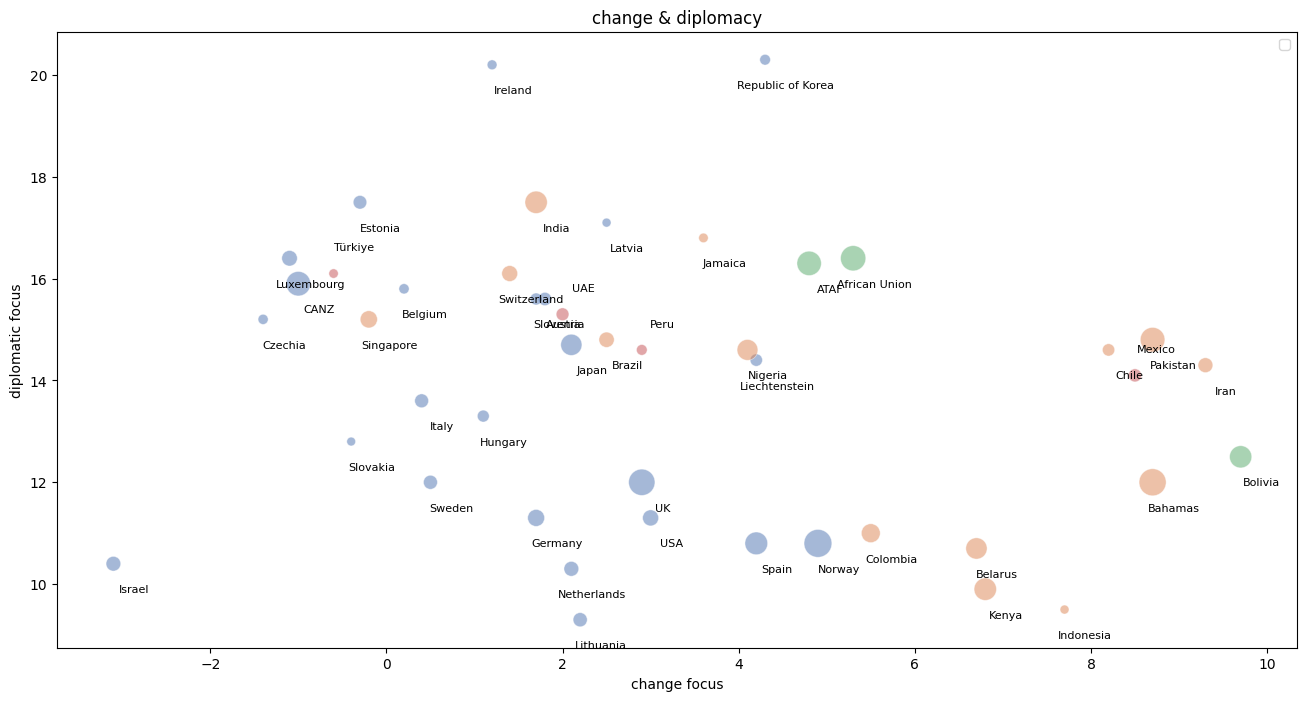

In [ ]:
# Specify the columns for data and class
data_x = 'net_%'
data_y = 'org_%'
class_column = 'vote'
size_column = 'total_words_stand'

# Create a scatter plot using seaborn with hue argument for class coloring
plt.figure(figsize=(16,8))
sns.scatterplot(
    x=data_x, y=data_y, hue=class_column, data=df, palette="deep",
    size  = size_column, sizes=(40, 400),
    alpha = 0.5)


# Adjust annotation positioning to avoid overlaps
offset = 10  # Adjust this value to control the distance of annotations from data points
for i, txt in enumerate(df['text_short']):
    x = df[data_x].iloc[i]
    y = df[data_y].iloc[i]
    ha = 'center'  # Horizontal alignment
    va = 'bottom' if df[class_column].iloc[i] == 'A' else 'top'  # Vertical alignment based on class
    plt.annotate(txt, (x, y), textcoords="offset points",
                #  arrowprops=dict(lw=0.01, ls='-'),
                 xytext=(offset * (-1.5 if ha == 'right' else 1.5), offset * (-1.5 if va == 'top' else 1.5)),
                 fontsize=8, ha=ha, va=va)


# Customize the plot (optional)
plt.xlabel('change focus')  # Set labels for x and y axes
plt.ylabel('diplomatic focus')
plt.title('change & diplomacy')  # Add a title for the plot
plt.grid(False)  # Add gridlines for better readability (optional)
plt.legend("")  # Add legend for class labels
plt.show()


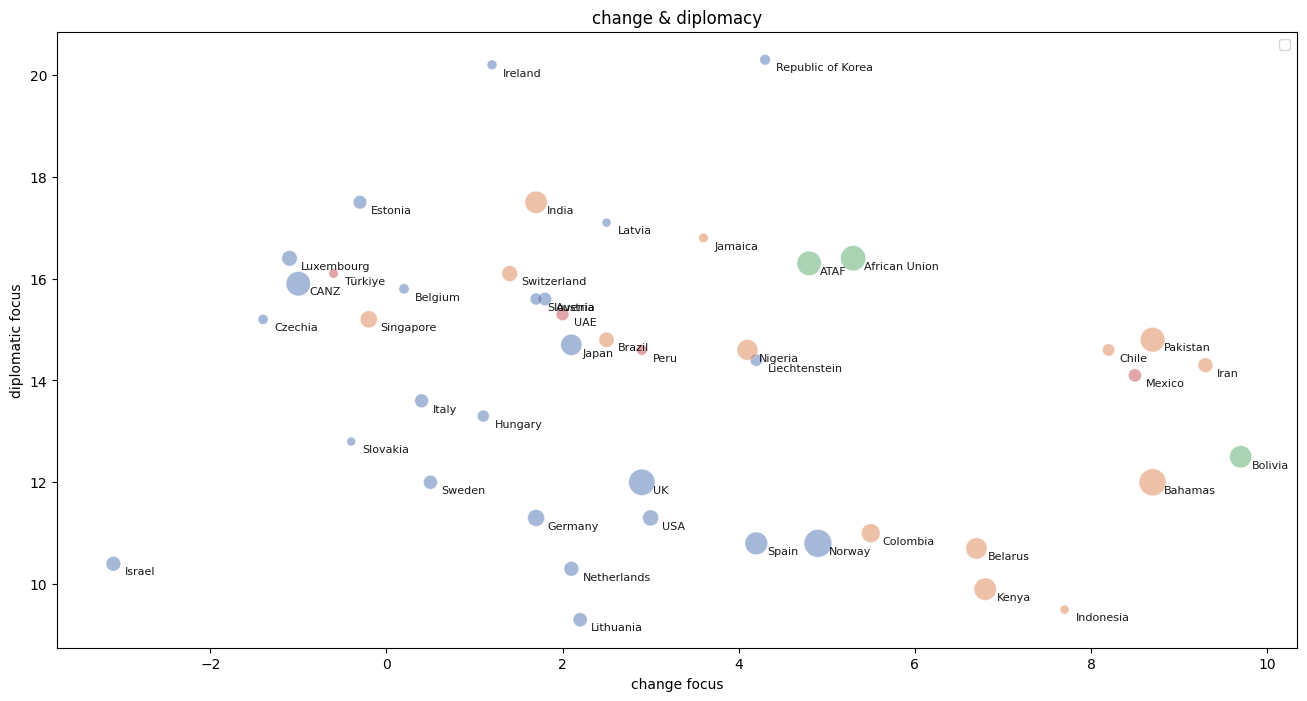

In [ ]:
# Specify the columns for data and class
data_x = 'net_%'
data_y = 'org_%'
class_column = 'vote'
size_column = 'total_words_stand'

# Create a scatter plot using seaborn with hue argument for class coloring
plt.figure(figsize=(16,8))
sns.scatterplot(
    x=data_x, y=data_y, hue=class_column, data=df, palette="deep",
    size  = size_column, sizes=(40, 400),
    alpha = 0.5)


# Adjust annotation positioning to avoid overlaps
# offset = 10  # Adjust this value to control the distance of annotations from data points
# for i, txt in enumerate(df['text_short']):
#     x = df[data_x].iloc[i]
#     y = df[data_y].iloc[i]
#     ha = 'center'  # Horizontal alignment
#     va = 'bottom' if df[class_column].iloc[i] == 'A' else 'top'  # Vertical alignment based on class
#     plt.annotate(txt, (x, y), textcoords="offset points",
#                 #  arrowprops=dict(lw=0.01, ls='-'),
#                  xytext=(offset * (-1.5 if ha == 'right' else 1.5), offset * (-1.5 if va == 'top' else 1.5)),
#                  fontsize=8, ha=ha, va=va)

for i, row in df.iterrows():
  xval, yval, label = row[data_x], row[data_y], row['text_short']
  plt.annotate(label, (xval, yval), xytext=(8, -8),  # Adjust offset values for better placement
                 textcoords='offset points', fontsize=8, alpha=0.9)  # Adjust font size and transparency



# Customize the plot (optional)
plt.xlabel('change focus')  # Set labels for x and y axes
plt.ylabel('diplomatic focus')
plt.title('change & diplomacy')  # Add a title for the plot
plt.grid(False)  # Add gridlines for better readability (optional)
plt.legend("")  # Add legend for class labels
plt.show()
